<a href="https://colab.research.google.com/github/visheshagrawal/Course-Computer-Vision/blob/main/CV_A2_2018420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #Vishesh Agrawal
# #2018420
# #Assignment 2

Importing all the libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow
import copy

In [ ]:
img = cv2.imread("A2.PNG")
M, N = img.shape[0],img.shape[1]

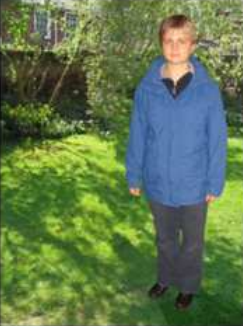

In [ ]:
cv2_imshow(img)

Question 1

In [ ]:
# Make rgbxy array
rgbxy_array=np.zeros((img.shape[0],img.shape[1],5))
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    a=img[i][j].tolist()
    a.extend([i,j])
    rgbxy_array[i][j]=np.array(a)

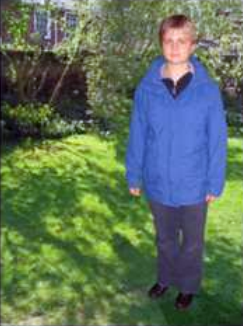

In [ ]:
# normalised image
# norm_array=copy.deepcopy(rgbxy_array)
min_values=np.min(rgbxy_array.reshape((-1,5)),axis=0)
max_values=np.max(rgbxy_array.reshape((-1,5)),axis=0)
norm_array=np.divide(rgbxy_array-min_values,max_values-min_values)
cv2_imshow(norm_array[:,:,0:3]*255)

In [ ]:
rgbxy_array.shape

(326, 243, 5)

FUZZY C MEANS CLUSTERING

In [ ]:
#Q1

!pip install fuzzy-c-means
import fcmeans
from fcmeans import FCM

In [ ]:
# convert in the form
X = (
    np.asarray(norm_array)                              # convert a PIL image to np array
    .reshape((N*M, 5))                             # reshape the image to convert each pixel to an instance of a data set
)

fcm = FCM(n_clusters=32)                           # create a FCM instance with 10 clusters
fcm.fit(X)    

# use the model and predict the label and cluster centers
model=fcm
pc = model.partition_coefficient
pec = model.partition_entropy_coefficient
   
    
fcm_centers = model.centers
fcm_labels = model.predict(X)

image_fcm_labels = fcm_labels.reshape(N,M)

print(image_fcm_labels)
print(fcm_centers)

[[20 20 20 ... 25 25 22]
 [22 22 22 ...  6  6  6]
 [16 16 16 ... 20 20 20]
 ...
 [14 14 14 ...  9  9  9]
 [ 9  9  9 ... 18 18 18]
 [18 18 18 ... 14 14 14]]
[[0.7963547  0.4551864  0.33563384 0.5208675  0.7766795 ]
 [0.23131867 0.36285296 0.30169368 0.3448345  0.45483992]
 [0.3600261  0.64267546 0.53573805 0.87732416 0.1841727 ]
 [0.31695673 0.41792908 0.38331825 0.11297626 0.53925645]
 [0.21208617 0.51458806 0.37469673 0.6076596  0.34611997]
 [0.18121698 0.42932084 0.2827071  0.59138805 0.18894826]
 [0.37540635 0.47442672 0.44615307 0.11798397 0.62453705]
 [0.39709717 0.5025309  0.47759086 0.13084921 0.88724554]
 [0.17485845 0.3753728  0.23779975 0.664129   0.12391427]
 [0.25605112 0.5060247  0.39412045 0.8561233  0.31622615]
 [0.14316821 0.15809788 0.17923428 0.28849933 0.25654498]
 [0.36911023 0.2796001  0.28579992 0.69145095 0.759302  ]
 [0.13353357 0.16038072 0.1707787  0.30081037 0.0946945 ]
 [0.3833902  0.80812716 0.67292225 0.48823252 0.36503595]
 [0.12480964 0.23284699 0.119874

In [ ]:
new_image=np.zeros((img.shape[0],img.shape[1],5)) 

for i in range(image_fcm_labels.shape[0]):
  for j in range(image_fcm_labels.shape[1]):
    print(i,j)
    new_image[i][j]=fcm_centers[image_fcm_labels[i][j]]

In [ ]:
# FCM clustered image visulaisation
cv2_imshow(new_image[:,:,0:3])

Region Adjacency Graph for Merging neighbouring pixels together

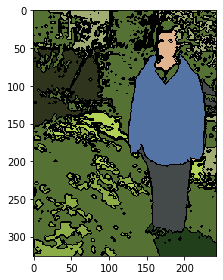

In [ ]:
from skimage import data, io, segmentation, color
from skimage.future import graph
import numpy as np


def _weight_mean_color(graph, src, dst, n):
    """Callback to handle merging nodes by recomputing mean color.

    The method expects that the mean color of `dst` is already computed.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the `"weight"` attribute set as the absolute
        difference of the mean color between node `dst` and `n`.
    """

    diff = graph.nodes[dst]['mean color'] - graph.nodes[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """Callback called before merging two nodes of a mean color distance graph.

    This method computes the mean color of `dst`.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    """
    graph.nodes[dst]['total color'] += graph.nodes[src]['total color']
    graph.nodes[dst]['pixel count'] += graph.nodes[src]['pixel count']
    graph.nodes[dst]['mean color'] = (graph.nodes[dst]['total color'] /
                                      graph.nodes[dst]['pixel count'])


# img = data.coffee()
# labels = segmentation.slic(img, compactness=30, n_segments=100)
labels=np.array(image_fcm_labels)
g = graph.rag_mean_color(img, labels)

labels2 = graph.merge_hierarchical(labels, g, thresh=35, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)

out = color.label2rgb(labels2, img, kind='avg', bg_label=0)
out = segmentation.mark_boundaries(cv2.cvtColor(out, cv2.COLOR_BGR2RGB), labels2, (0, 0, 0))
io.imshow(out)
io.show()

In [ ]:
image_fcm_labels=image_fcm_labels.reshape((326,243))
image_fcm_labels.shape
type(image_fcm_labels)
type(np.array(image_fcm_labels))

numpy.ndarray

Q2) 
Spatial and Contrast Cues

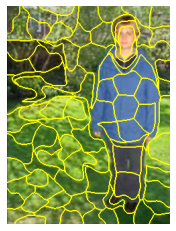

In [ ]:
#Q2

from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse

segments = slic(img, n_segments = 100, sigma = 5)
fig = plt.figure("Superpixels -- %d segments" % (100))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), segments))
plt.axis("off")
plt.show()

In [ ]:
color_array=np.array([[0,0,0]]*(segments.max()+1),dtype=np.float)
xy_array=np.array([[0,0]]*(segments.max()+1),dtype=np.float)
x_min=0
y_min=0
x_max=img.shape[1]
y_max=img.shape[0]

for i in range(segments.max()+1):
  points = np.where(segments==i)
  xy_array[i] = np.array(points).mean(axis=1)
  xy_array[i] = (xy_array[i] - np.array([x_min,y_min]))/(np.array([x_max,y_max])-np.array([x_min,y_min]))
  color_array[i] = norm_array[:,:,:3][points].mean(axis=0)

rgbxy_array = np.append(color_array,xy_array,axis=-1)

In [ ]:
k_cluster = 10
Z = np.float32(rgbxy_array)
criteria = (cv2.TERM_CRITERIA_EPS, 10, 1.0)
_,label,center=cv2.kmeans(Z,k_cluster,None,criteria,10000,cv2.KMEANS_PP_CENTERS)

In [ ]:
center

array([[0.2726139 , 0.6743559 , 0.5359888 , 0.6978373 , 0.24980769],
       [0.20025325, 0.2882116 , 0.19769865, 1.2184958 , 0.540066  ],
       [0.19518587, 0.27595314, 0.2587589 , 0.42124817, 0.17312263],
       [0.357164  , 0.4483419 , 0.42665702, 0.14181751, 0.28546432],
       [0.73440903, 0.42169452, 0.3139207 , 0.6193711 , 0.5425664 ],
       [0.3130831 , 0.5418329 , 0.42780733, 0.91476196, 0.62231773],
       [0.52621067, 0.58695865, 0.6342132 , 0.13880837, 0.56234276],
       [0.28336298, 0.53512007, 0.43243816, 1.1815181 , 0.18314174],
       [0.19919701, 0.46909598, 0.3238136 , 0.86872816, 0.14583753],
       [0.3745332 , 0.32586643, 0.29727772, 0.38057417, 0.6510993 ]],
      dtype=float32)

In [ ]:
def make_image(original_image,image_label,superpixel_label,cluster_value):
  new_image = np.zeros_like(original_image,dtype=np.float)
  for i in range(new_image.shape[0]):
    for j in range(new_image.shape[1]):
      new_image[i][j]=cluster_value[superpixel_label[image_label[i][j]][0]]

  return new_image

In [ ]:
def contrast_cue(center_array,label_array):
  total_pixels=label_array.shape[0]
  cue_array=[]
  for i in range(center_array.shape[0]):
    total_output=0
    for j in range(center_array.shape[0]):
      if (i!=j):
        result = np.where(label_array ==j)  
        num_pixels_j=result[0].shape[0]
        cluster_distance = np.sqrt(np.square((center_array[i]-center_array[j])[:3]).sum())
        total_output+=(cluster_distance*num_pixels_j/total_pixels)
    cue_array.append(total_output)
  return cue_array

contrast_cue_map = make_image(img,segments,label,contrast_cue(center,label))

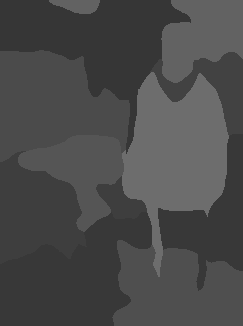

In [ ]:
cv2_imshow(contrast_cue_map*255)

In [ ]:
def spatial_cue(center,label_array,center_array):
  spatial_array=[]
  sigma_val = 0.4#(1/(2**0.5))**0.5
  for j in range(k_cluster):
    result = np.where(label_array ==j) 
    num_pixels_j=result[0].shape[0]
    total=0
    for i in range(center_array.shape[0]):    
      if (label_array[i]==j):  
        cluster_distance =((((center_array-center)**2).sum(axis=1))**0.5)[i]

        cluster_distance = np.exp(-0.5*np.square(cluster_distance/sigma_val))/(sigma_val*np.sqrt(2*3.14))

        total+=cluster_distance
   
    spatial_array.append(total/num_pixels_j)
  
  return spatial_array
 
center = np.array([norm_array[:,:,3][M//2][N//2],norm_array[:,:,4][M//2][N//2]])

spatial_cue_map = make_map(img,segments,label,np.array(spatial_cue(center,label,rgbxy_array[:,-2:])))

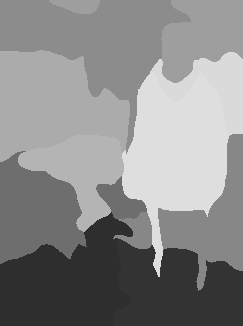

In [ ]:
cv2_imshow(spatial_cue_map*255)

In [ ]:
#Q3

from scipy import integrate

def separation_measure(cue_map):
  gray_map = cue_map[:,:,0]
  gray_image = gray_map*255

  min = np.inf
  threshold = -1
  for i in range(1,256):
    before_num = (gray_image < i).sum()
    after_num = (gray_image >= i).sum()
    if(after_num==0):
      break
    before_tss = ((gray_image[gray_image < i]-gray_image[gray_image < i].mean())**2).sum()
    after_tss = ((gray_image[gray_image >= i]-gray_image[gray_image >= i].mean())**2).sum()

    curr_sum = before_tss + after_tss
    if(curr_sum<min):
      min = curr_sum
      threshold = i

  # first we calculate foreground and background pixels by threshold
  fg_pixels = np.where(gray_image>threshold)
  bg_pixels = np.where(gray_image<=threshold)

  #now for the grayscale images we take out foreground and bg part
  foreground = gray_map[fg_pixels]
  background = gray_map[bg_pixels]

  #calculate the mean and standard deviation for fg
  fg_mean = foreground.mean()
  fg_std = foreground.std()

  #calculate the mean and standard deviation for bg
  bg_mean = background.mean()
  bg_std = background.std()

  #putting all the values to calculate z
  z = ((bg_mean*(fg_std**2) - fg_mean*(bg_std**2))/(fg_std**2-bg_std**2)) + (fg_std*bg_std/(fg_std**2-bg_std**2)) * (((fg_mean-bg_mean)**2) - 2*(fg_std**2-bg_std**2)*(np.log(bg_std)-np.log(fg_std)))**0.5

  # integrating for fg and bg
  fg_integral = lambda z: np.exp(-((z-fg_mean)/fg_std)**2)/(fg_std*((2*np.pi)**0.5))
  bg_integral = lambda z: np.exp(-((z-bg_mean)/bg_std)**2)/(bg_std*((2*np.pi)**0.5))
  
  #summing fg_integral and bg_integral
  LS = integrate.quad(fg_integral, 0, z)[0] + integrate.quad(bg_integral, z, 1)[0]

  # finally calculating the respective cue weight
  cue_weight = 1/(1+np.log10(1+256*LS))

  return cue_weight

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


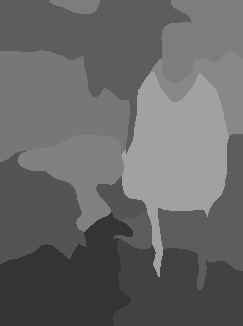

In [ ]:
contrast_cue_weight = separation_measure(contrast_cue_map)
spatial_cue_weight = separation_measure(spatial_cue_map)

resultant_cue_map = ((contrast_cue_weight/(contrast_cue_weight+spatial_cue_weight))*contrast_cue_map) + ((spatial_cue_weight/(contrast_cue_weight+spatial_cue_weight))*spatial_cue_map)
cv2_imshow(resultant_cue_map*255)

In [ ]:
gray = resultant_cue_map[:,:,0]*255


min = np.inf
threshold = -1
for i in range(1,256):
  before_num = (gray < i).sum()
  after_num = (gray >= i).sum()
  if(after_num==0):
    break
  before_tss = ((gray[gray < i]-gray[gray < i].mean())**2).sum()
  after_tss = ((gray[gray >= i]-gray[gray >= i].mean())**2).sum()

  curr_sum = before_tss + after_tss
  if(curr_sum<min):
    min = curr_sum
    threshold = i
  
print(threshold)
resultant_cue_map[np.where(gray<threshold)] = 0  

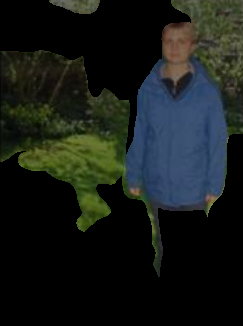

In [ ]:
cv2_imshow(resultant_cue_map*img)